# <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4484c2; text-align: center;">Preprocessing</div>

Dataset description:

 To tackle fake news, in this paper, we present a dataset of social media posts and articles on COVID-19 with real and fake labels. The targeted media platforms for the data collection are designated to be the ones that are actively used for social networking for peer communication and relaying information, which could be in the form
 of news, events, social phenomenon, etc. We collect both real news and fake claims that surfaced on social media on COVID-19 topic. Fake claims are collected from various fact-checking websites like Politifact, NewsChecker, Boomlive, etc., and from tools like Google fact-check-explorer and IFCN chatbot. Real news is collected from
 Twitter using verified twitter handles. We also perform exploratory data analysis and implement four machine learning baselines.

Information source per label:
* Real- Tweets from verified sources.
* Fake- Tweets, posts, articles.


Source: [Fighting an Infodemic: COVID-19 Fake News Dataset](https://arxiv.org/pdf/2011.03327)

## <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4484c2;">Load data</div>

In [105]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [98]:
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

In [18]:
# datasets
DATA = 'data/'

test = pd.read_csv(DATA + 'Constraint_English_Test.csv', delimiter=';', encoding='ISO-8859-1')
train = pd.read_csv(DATA + 'Constraint_English_Train.csv', delimiter=';', encoding='ISO-8859-1')
val = pd.read_csv(DATA + 'Constraint_English_Val.csv', delimiter=';', encoding='ISO-8859-1')

tweets = pd.concat([train, val, test], ignore_index=True)
tweets.drop(columns=['id'], inplace=True)

In [24]:
tweets.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


## <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4484c2;">Exploratory Data Analysis (EDA)</div>

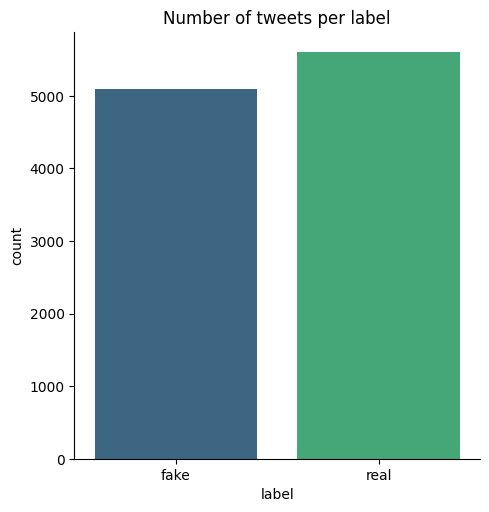

In [41]:
p = sns.catplot(x='label', kind='count', data=tweets, palette='viridis')
p.set(title='Number of tweets per label')

In [23]:
tweets = tweets.astype({"tweet": "string", "label":"category"})

In [25]:
tweets.describe()

,tweet,label
count,10700,10700
unique,10699,2
top,Our combined total of confirmed and probable c...,real
freq,2,5600


In [26]:
# Search for duplicate reviews
tweets[tweets['tweet'].isin(tweets['tweet'][tweets['tweet'].duplicated()])]

,tweet,label
5458,Our combined total of confirmed and probable c...,real
7329,Our combined total of confirmed and probable c...,real


### <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4a44c2;">Message length</div>

In [44]:
tweets_analisis = tweets.copy()
tweets_analisis['length'] = tweets_analisis['tweet'].str.len()

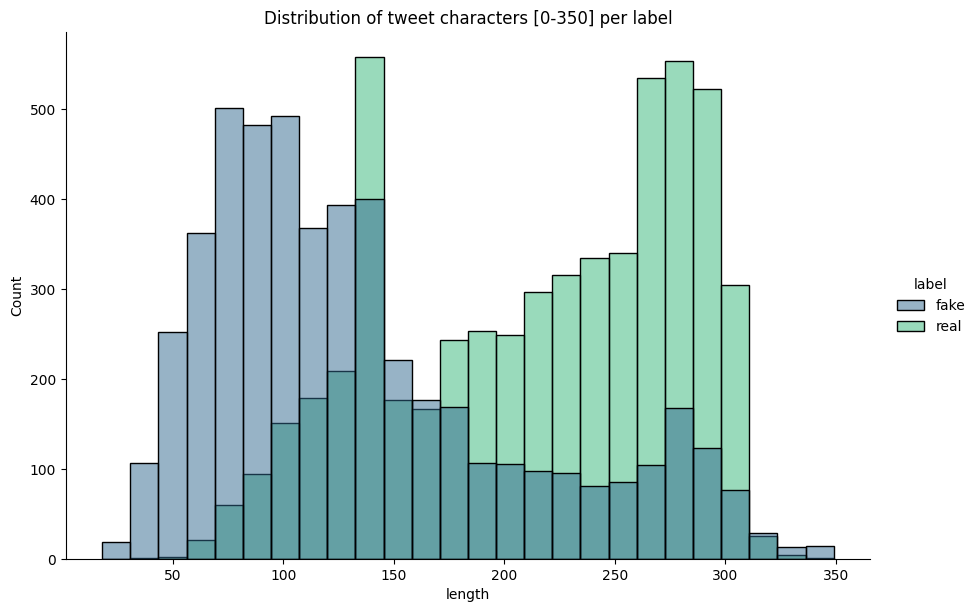

In [101]:
filtered_tweets = tweets_analisis[(tweets_analisis['length'] > 0) & (tweets_analisis['length'] <= 350)]
p = sns.displot(filtered_tweets, x='length', hue='label', palette='viridis', height=6, aspect=1.5)
p.set(title='Distribution of tweet characters [0-350] per label')

From the plot we can extract the following: messages that contains fake information are usually shorter than real messages.

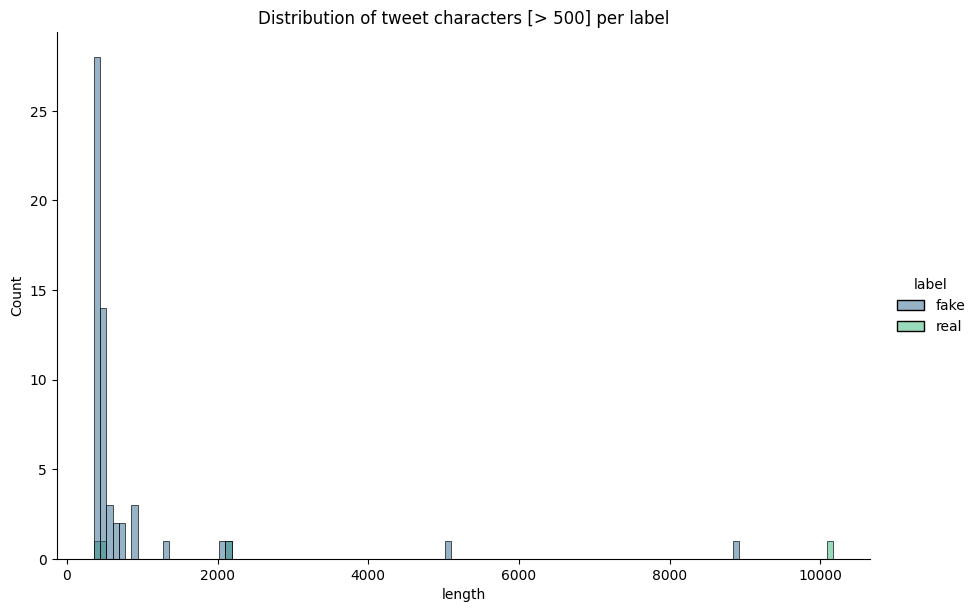

In [102]:
filtered_tweets = tweets_analisis[(tweets_analisis['length'] > 350)]
p = sns.displot(filtered_tweets, x='length', hue='label', palette='viridis', height=6, aspect=1.5)
p.set(title='Distribution of tweet characters [> 500] per label')

In [111]:
def word_count(tweet):
    tweet_list = tweet.split()
    return len(tweet_list)

def mean_word_length(review):
    if len(review.strip()) > 0:
        return np.mean([len(word) for word in review.split()])
    else:
        return 0  

In [104]:
tweets_analisis['word_count'] = tweets_analisis['tweet'].apply(word_count)

In [112]:
tweets_analisis['mean_word_length'] = tweets_analisis['tweet'].apply(mean_word_length)

In [115]:
tweets_analisis.head()

,tweet,label,length,word_count,mean_word_length
0,The CDC currently reports 99031 deaths. In gen...,real,190,29,5.586207
1,States reported 1121 deaths a small rise from ...,real,129,18,6.222222
2,Politically Correct Woman (Almost) Uses Pandem...,fake,131,16,7.250000
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real,204,27,6.592593
4,Populous states can generate large case counts...,real,231,42,4.523810


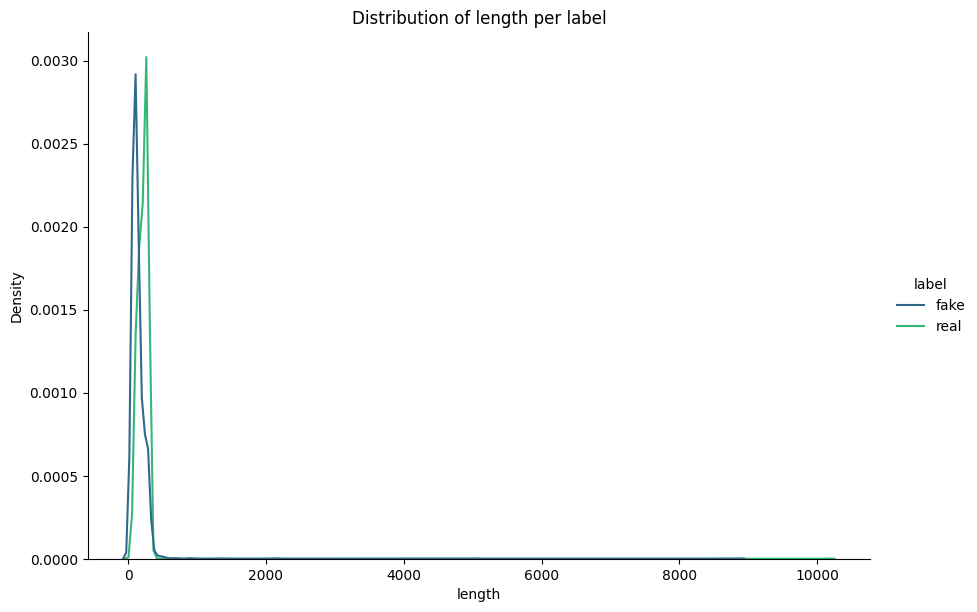

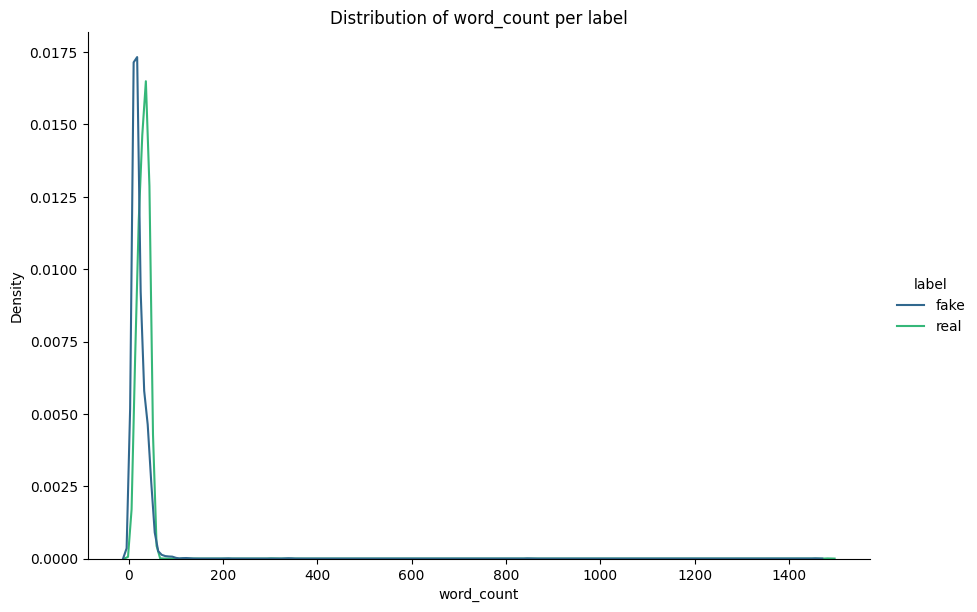

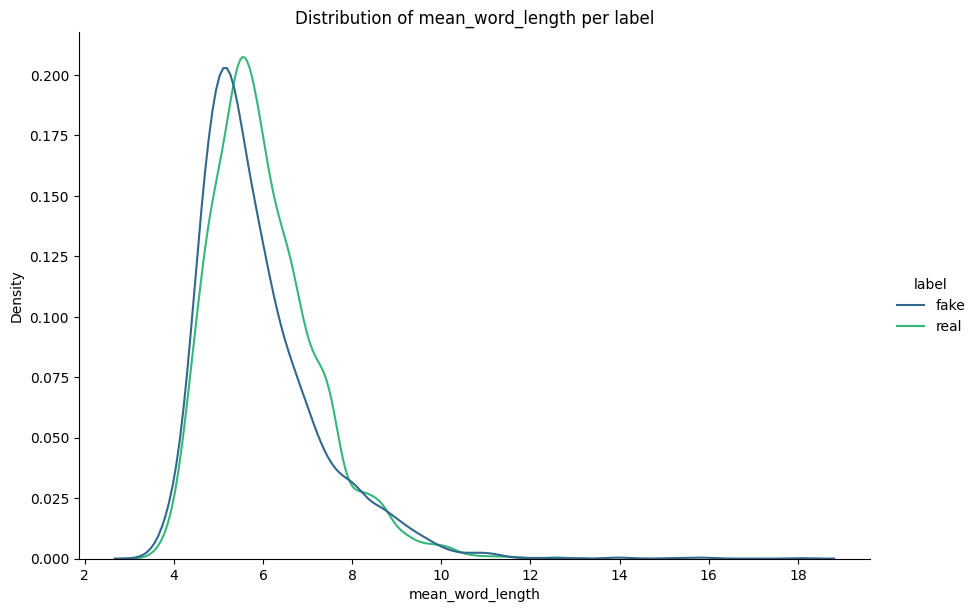

In [ ]:
features = tweets_analisis.columns.tolist()[2:]

for feature in features:
    p = sns.displot(tweets_analisis, x=feature, hue='label', palette='viridis', height=6, aspect=1.5)
    p.set(title=f'Distribution of {feature} per label')

### <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4a44c2;">Word Cloud</div>

In [73]:
# import package
from wordcloud import WordCloud

In [72]:
# group messages by label
real_messages = (" ").join(tweets["tweet"][tweets['label'] == 'real'])
fake_messages = (" ").join(tweets["tweet"][tweets['label'] == 'fake'])

In [99]:
# we'll have to deal with stopwords and other useless words or links later
stopwords_wordcloud = set(stopwords.words('english'))
stopwords_wordcloud.update(['https', 'co', 't'])

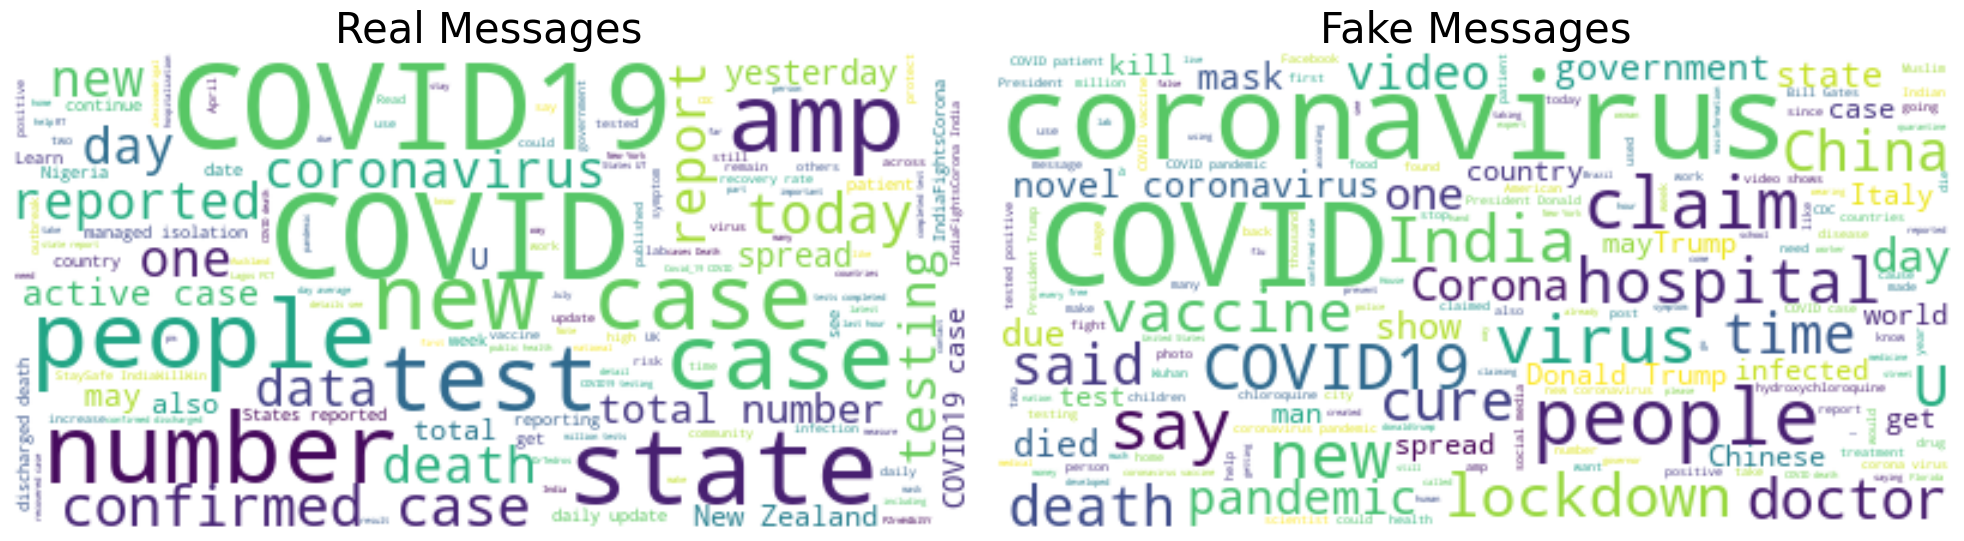

In [ ]:
plt.figure(figsize=(20, 10)) 
messages = [real_messages, fake_messages]
titles = ["Real Messages", "Fake Messages"]

for idx, text in enumerate(messages):
    plt.subplot(1, 2, idx + 1)
    wordcloud = WordCloud(background_color='white', max_font_size=50, random_state=42, 
                          stopwords=stopwords_wordcloud).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(titles[idx], fontsize=30)  

plt.subplots_adjust(wspace=0.3) 
plt.tight_layout(pad=2.0)      
plt.show()

Most relevant words in the dataset:

Real messages: "case", "confirmed", "data", "report", "testing", "people", "daily update", "total".

Fake messages: "claim", "virus", "time", "say", "die", "pandemic", "lockdown", "Donald Trump", "government", "video", "kill", "China".

No relevant information can be extracted from the wordclouds, however, we can see that real messages contain words with intent to inform, while fake messages contain more variety of words.

## <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4484c2;">Preprocessing</div>